In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def display_image(img, cmap=None):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

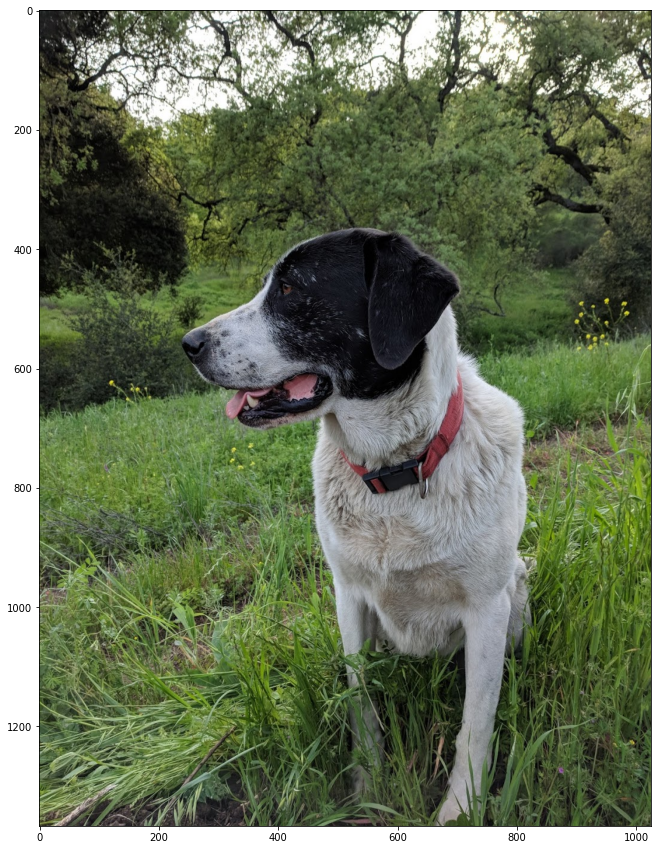

In [4]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
display_image(full)

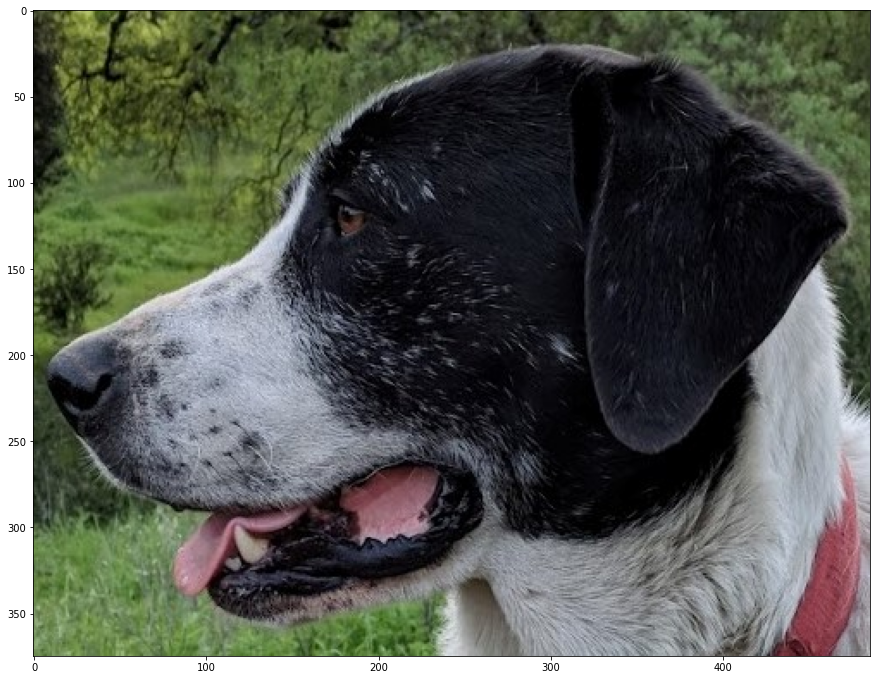

In [5]:
dog_face = cv2.imread('../DATA/sammy_face.jpg')
dog_face = cv2.cvtColor(dog_face, cv2.COLOR_BGR2RGB)
display_image(dog_face)

In [14]:
eval('sum(full[:,1,1])')

113491

In [35]:
methods = ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED']
i = 0
res=[]
rec=[]
for method_match in methods:
    dog_copy = full.copy()
    method = eval(method_match)
    res.append(cv2.matchTemplate(dog_copy,dog_face,method))

    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res[i])
    if method in [cv2.TM_SQDIFF ,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height,width,channels = dog_face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)

    rec.append(cv2.rectangle(dog_copy,top_left,bottom_right,(255,0,0),10))

    i += 1


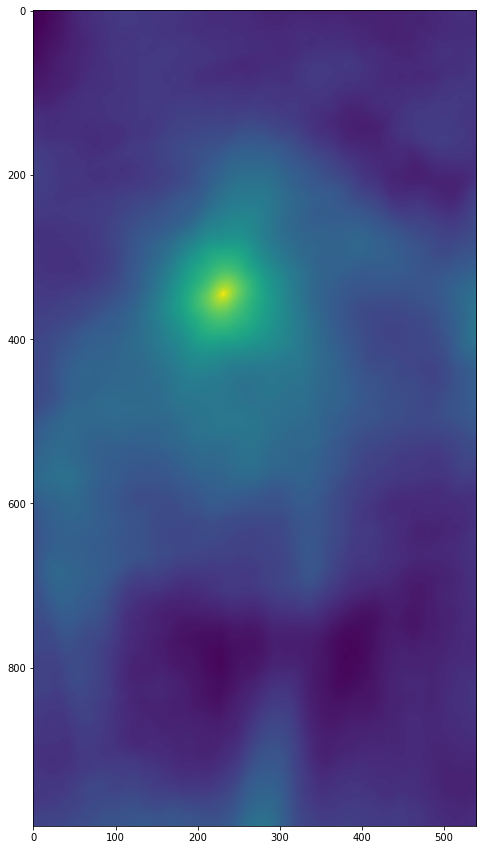

In [26]:
display_image(res[5])

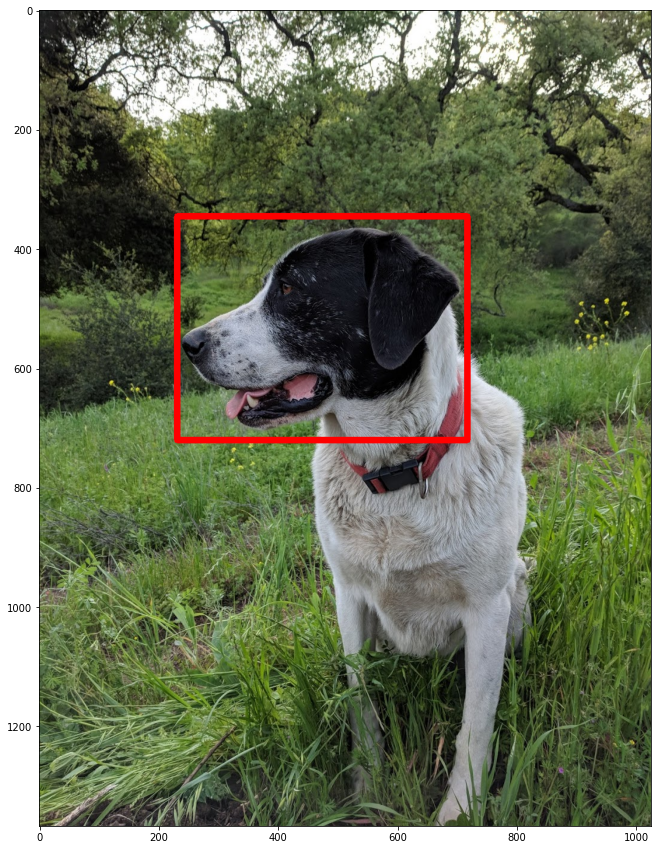

In [41]:
display_image(rec[3])

In [58]:
def display_coincidences(pictures,heatmaps,methods):
    if len(pictures) == len(heatmaps) and len(pictures) == len(methods):
        for image,heatmap,method in zip(pictures,heatmaps,methods):
            plt.subplot(121)
            plt.imshow(image)
            plt.title('IMAGE')

            plt.subplot(122)
            plt.imshow(heatmap)
            plt.title('HEATMAP')

            plt.suptitle(method)
            plt.show()
            print('\n')

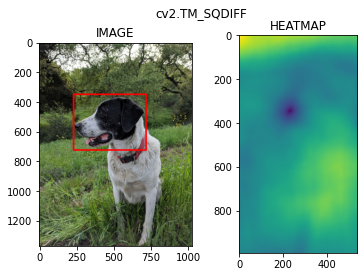

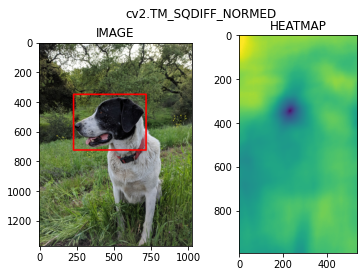

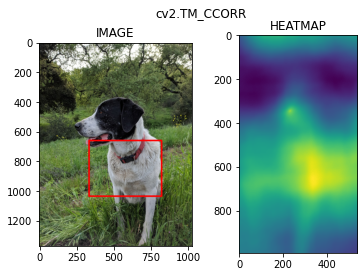

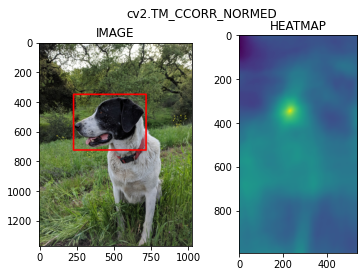

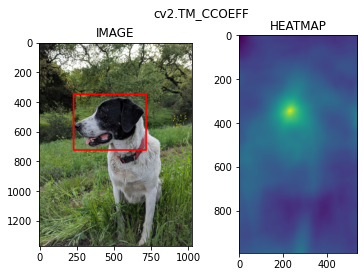

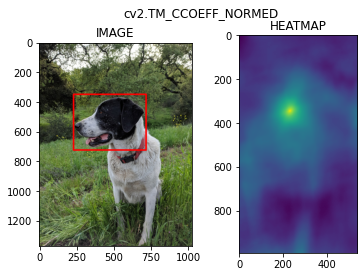

In [59]:
display_coincidences(rec,res,methods)